# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import *
from nltk.stem import  WordNetLemmatizer
from nltk.corpus import stopwords
import re
import os
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
import random
import emoji
from wordcloud import WordCloud
import plotly.express as px
from nltk import pos_tag
from plotly import graph_objects as go
from collections import Counter
import string
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
random.seed(10)

In [2]:
colors1 = ['#32d732','#008f00']
colors2 = ['#003d00', '#ccf5cc']
color3 = ['Salmon', 'FireBrick', 'MediumVioletRed', 'Tomato', 'Orange', 'Gold', 'DarkKhaki', 'Lavender', 'Plum', 'LimeGreen', 'MediumSpringGreen', 'Green', 'DeepSkyBlue', 'Aquamarine', 'MediumSlateBlue']

# Download Some Packages

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [5]:
Corpus = pd.read_csv('MovieReviewTrainingDatabase.csv')
Corpus.rename(columns={'review': 'Review', 'sentiment': 'Sentiment'}, inplace=True)
Corpus


,Sentiment,Review
0,Positive,With all this stuff going down at the moment w...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...
2,Negative,The film starts with a manager (Nicholas Bell)...
3,Negative,It must be assumed that those who praised this...
4,Positive,Superbly trashy and wondrously unpretentious 8...
...,...,...
24995,Negative,It seems like more consideration has gone into...
24996,Negative,I don't believe they made this film. Completel...
24997,Negative,"Guy is a loser. Can't get girls, needs to buil..."
24998,Negative,This 30 minute documentary Buñuel made in the ...


# Percantage Of Each Sentiment

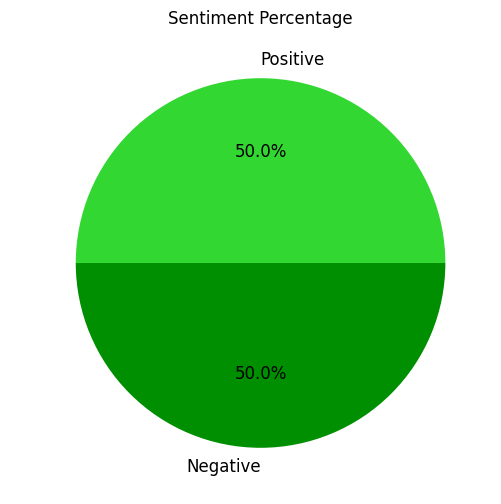

In [6]:
Corpus['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors1,
                                                    ylabel = ' ');

# Count Of Each Sentiment

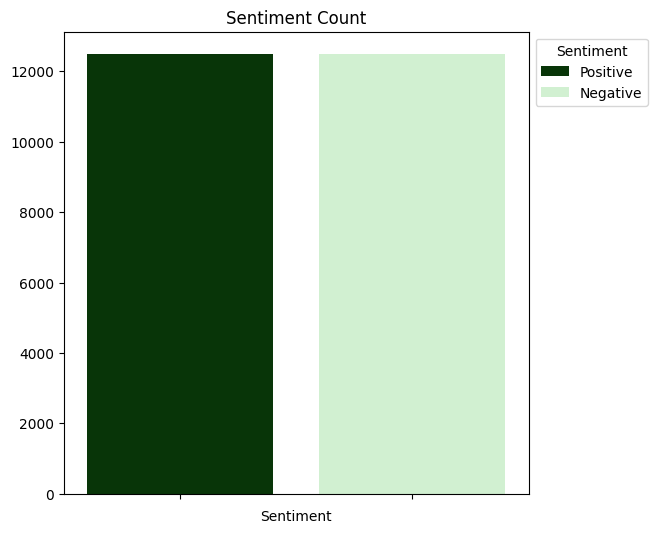

In [7]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Corpus, dodge=False, hue='Sentiment',  order= Corpus['Sentiment'].value_counts().index, hue_order =Corpus['Sentiment'].value_counts().index,  palette=colors2);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# Number Of Sentences

In [8]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[ Corpus["NumberOfSentences"] == 0].index, inplace = True)


In [9]:
Corpus['NumberOfSentences'].sum()

311468

# Average Number Of Sentences

In [10]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

12

# Maximum Number Of Sentences

In [11]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

282

# Minimum Number Of Sentences

In [12]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Text Normalization

In [13]:
def remove_emojis(text):
     "Remove All Emojis From Text"
     text = emoji.replace_emoji(text, replace="")
     return text

def remove_duplicate_char(text):
     "Remove Chars Word Has More Than 2 Same Following Char"
     text = re.sub(r'(.)\1+', r'\1\1', text)
     return text

def remove_single_char(text):
     "Remove Alone Chars From Text"
     text = ' '.join( [w for w in text.split() if len(w)>1] )
     return text

def remove_special_character_(text):
     "Remove Special Character From Text"
     Punctuations = '`؛،؟.,«»÷-' + string.punctuation
     for punctuation in Punctuations:
        text = text.replace(punctuation, ' ')
     return text   

def remove_new_line_char(text):
     "Remove New Line Symbols From Text"
     text = text.replace('\n', ' ')
     return text  
 
def remove_number(text):
     "Remove All Number From Text"
     text = re.sub(r'[0-9٠-٩]', '', text)
     return text

def remove_html_tags(text):
    "Remove All HTL Tags From Text"
    text = re.sub("<.*?>", ' ', text)
    return text

def remove_non_english(text):
    "Remove Non English Word And Char"
    char = set(string.printable)
    for c in text:
        if c not in char:
            text = text.replace(c, ' ')
    return text

def remove_whitespace(text):
     "Remove Extra WhiteSpace"
     text = text.strip()
     return text 

def remove_unicode_characters_(text):
     "Remove Unicode Char"
     for character in text:
        if (ord(character) < 47) or ((ord(character) > 123 and ord(character) < 1568)) or ((ord(character) > 1641 and ord(character) < 8239)) :
         text = text.replace(character, ' ')
     return text

def remove_stop_words(text):
     "Remove StopWords From Text"
     StopWords1 = set(stopwords.words('english'))
     StopWords2 = set(open('EnglishStopWords.txt','r').read().split('\n'))
     StopWords = StopWords1.union(StopWords2)
     text = word_tokenize(text)
     text = [word for word in text if word not in StopWords]
     return ' '.join(text)

def remove_longest_than_(text):
     "Remove All Words That Longest Than The Longest Word In Englis"
     for word in text.split():
          if len(word) >=46:
               text = text.replace(word, '')
     return text

def lemmatizer_(text):
     "Lowers Inflection In Words To Their Root Forms"
     lemmatizer = WordNetLemmatizer()
     text = " ".join([lemmatizer.lemmatize(word, pos='v') for word in text.split()])
     return text


In [14]:
def text_normalization(text):
    text = text.lower()
    text = remove_emojis(text)
    text = remove_html_tags(text)
    text = remove_duplicate_char(text)
    text = remove_number(text)
    text = remove_single_char(text)
    text = remove_non_english(text)
    text = remove_unicode_characters_(text)
    text = remove_special_character_(text)
    text = remove_stop_words(text)
    text = remove_new_line_char(text)
    text = remove_longest_than_(text)
    text = remove_whitespace(text)
    text = lemmatizer_(text)
    return ''.join(text)

In [15]:
Corpus['Normalized_Review'] = Corpus['Review'].apply(lambda x: text_normalization(x))
Corpus

,Sentiment,Review,NumberOfSentences,Normalized_Review
0,Positive,With all this stuff going down at the moment w...,19,stuff go moment mj start listen music watch od...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...,10,classic war worlds timothy hines entertain fil...
2,Negative,The film starts with a manager (Nicholas Bell)...,14,film start manager nicholas bell give welcome ...
3,Negative,It must be assumed that those who praised this...,7,assume praise film greatest film opera read ca...
4,Positive,Superbly trashy and wondrously unpretentious 8...,16,superbly trashy wondrously unpretentious explo...
...,...,...,...,...
24995,Negative,It seems like more consideration has gone into...,8,like consideration imdb review film go source ...
24996,Negative,I don't believe they made this film. Completel...,15,believe make film completely unnecessary first...
24997,Negative,"Guy is a loser. Can't get girls, needs to buil...",16,guy loser girls need build pick stronger succe...
24998,Negative,This 30 minute documentary Buñuel made in the ...,9,minute documentary bu uel make early spain poo...


# Number Of Unique Words

In [16]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

61533

# WordCloud

In [17]:
def word_cloud_(Sentiment):
    text = str(Corpus[Corpus['Sentiment'] == Sentiment]['Normalized_Review'])
    wordcloud = WordCloud(background_color='white', mode='RGB',width=1500,height=800).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='catrom')
    plt.axis("off")
    plt.title('Word Cloud For {} Sentiment'.format(Sentiment))
    plt.show()

**1-Negative**

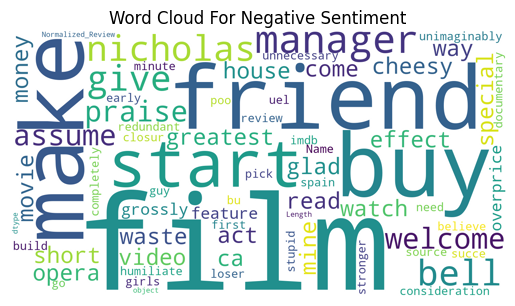

In [18]:
word_cloud_('Negative')

**2-Positive**

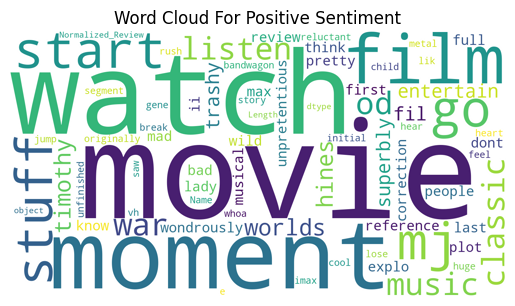

In [19]:
word_cloud_('Positive')

# Most Frequent Words 

In [20]:
MostFrequentWord = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF = pd.DataFrame(MostFrequentWord, columns=('Word', 'Count'))
MostFrequentWordDF

,Word,Count
0,film,48211
1,movie,44047
2,like,22372
3,see,20814
4,time,16177
5,make,15551
6,character,14183
7,watch,13940
8,think,12352
9,story,11990


In [21]:
fig = go.Figure(go.Funnel(
    y = MostFrequentWordDF['Word'].tolist(),
    x = MostFrequentWordDF['Count'].tolist(),
    marker = {"color": color3}))
fig.show()

In [22]:
fig = px.bar(MostFrequentWordDF, y='Word', x='Count',  orientation='h')
fig.show()

# Number Of Words 

In [23]:
Corpus["Number of Words"] = Corpus["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Corpus.drop(Corpus[ Corpus["Number of Words"] == 0].index, inplace = True)
Corpus["Number of Words"].sum()

2595981

# Number Of Charachters 

In [24]:
Corpus["Number of Charachters"] = Corpus["Normalized_Review"].str.len()
Corpus["Number of Charachters"].sum()

17369402

# Average Number Of Words 

In [25]:
AverageNaumberOfWords = int(np.round((Corpus["Number of Words"].mean())))
AverageNaumberOfWords

104

# Average Number Of Charachters 

In [26]:
AverageNumberOfCharachters = int(np.round(Corpus["Number of Charachters"].mean()))
AverageNumberOfCharachters

695

# Maximum Number Of Word

In [27]:
MaximumNaumberOfWords = Corpus["Number of Words"].max()
MaximumNaumberOfWords

1275

# Maximum Number Of Charachters 

In [28]:
MaximumNumberOfCharachters = Corpus['Number of Charachters'].max() 
MaximumNumberOfCharachters

7937

# Minimum Number Of Words

In [29]:
MimimumNaumberOfWords = Corpus["Number of Words"].min()
MimimumNaumberOfWords

3

# Minimum Number Of Charachters 

In [30]:
MinimumNumberOfCharachters = Corpus['Number of Charachters'].min() 
MinimumNumberOfCharachters

21

# Split The DataSet Into Independent Variables (X) And Dependent Variable (Y)

In [31]:
X= Corpus['Normalized_Review']
y = Corpus['Sentiment']

# Label Encoder

In [32]:
y = y.map({'Negative': 0, 'Positive': 1})

# Split The Dataset Into Training And Testing

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)

# TfidfVectorizer

In [34]:
Tfid = TfidfVectorizer()
X_train_Tfid = Tfid.fit_transform(X_train)
X_test_Tfid = Tfid.transform(X_test)

In [35]:
vocab = Tfid.vocabulary_
vocab

{'highly': 21238,
 'underrate': 48862,
 'film': 16609,
 'write': 52144,
 'movie': 31167,
 'kasdan': 25079,
 'take': 45918,
 'search': 41242,
 'mean': 29408,
 'live': 27317,
 'lay': 26568,
 'see': 41338,
 'wonder': 51916,
 'divide': 12904,
 'people': 34814,
 'create': 10241,
 'insulate': 23478,
 'violence': 50486,
 'hatred': 20606,
 'bigotry': 4500,
 'everyday': 15367,
 'life': 27042,
 'way': 51108,
 'ask': 2553,
 'question': 37446,
 'davis': 11148,
 'steve': 44460,
 'martin': 28892,
 'great': 19502,
 'beard': 3872,
 'make': 28351,
 'violent': 50487,
 'extension': 15712,
 'enjoyment': 14796,
 'cause': 7234,
 'society': 43284,
 'claire': 8291,
 'kind': 25484,
 'world': 52032,
 'throw': 46941,
 'away': 3063,
 'precious': 36300,
 'human': 22051,
 'mack': 28101,
 'immune': 22609,
 'possible': 36120,
 'pass': 34419,
 'bound': 5436,
 'race': 37556,
 'harder': 20440,
 'step': 44407,
 'finance': 16673,
 'course': 10055,
 'quote': 37524,
 'generalities': 18397,
 'honest': 21660,
 'raise': 37700,

# Models

In [36]:
def models_(model_name):
    model = model_name
    model.fit(X_train_Tfid, y_train)
    y_pred = model.predict(X_test_Tfid)
    return y_pred

# Confusion Matrix

In [37]:
def confusion_matrix_(y_pred):
        ConfusionMatrix = confusion_matrix(y_test, y_pred)
        return ConfusionMatrix

# Generate True Positive, False Positive, True Negative, False Negative

In [38]:
def positive_negative(Confusin_Matrix):
    False_Postive = Confusin_Matrix[0, 1]

    True_Positive = Confusin_Matrix[0, 0]

    False_Negative = Confusin_Matrix[1, 0]
    
    True_Negative = Confusin_Matrix[1, 1]

    return False_Postive, True_Positive, False_Negative, True_Negative

# Performance Merics

In [39]:
def performance_metrics(False_Postive, True_Positive, False_Negative, True_Negative):
     Accuracy = (True_Positive + True_Negative) / (True_Positive + True_Negative + False_Postive + False_Negative)
     Precision = True_Positive / (True_Positive+ False_Postive)
     Sensitivity = True_Positive / (True_Positive  + False_Negative)
     Specificity = True_Negative / (True_Negative + False_Negative)
     F1Score = (True_Positive) / ((True_Positive) + (0.5 *(False_Postive + False_Negative)))
     Error = 1 - Accuracy
     MetricsValues = pd.DataFrame(index=['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1Score', 'Error'], columns=['Values'], data=[Accuracy, Precision, Sensitivity, Specificity, F1Score, Error])
     return MetricsValues


# Machine Learning

**1. Naive Bayes**

In [40]:
model_name1 = MultinomialNB()
y_pred1 = models_(model_name1)

In [41]:
cm1 = confusion_matrix_(y_pred1)

In [42]:
False_Postive, True_Positive, False_Negative, True_Negative = positive_negative(cm1)

In [43]:
MetricsValues1 = performance_metrics(False_Postive, True_Positive, False_Negative, True_Negative)

In [44]:
MetricsValues1

,Values
Accuracy,0.857733
Precision,0.860453
Sensitivity,0.856121
Specificity,0.855007
F1Score,0.858281
Error,0.142267


**2. Logistic Regression**

In [45]:
model_name2 = LogisticRegression()
y_pred2 = models_(model_name2)

In [46]:
cm2 = confusion_matrix_(y_pred2)

In [47]:
False_Postive2, True_Positive2, False_Negative2, True_Negative2 = positive_negative(cm2)
MetricsValues2 = performance_metrics(False_Postive2, True_Positive2, False_Negative2, True_Negative2)
MetricsValues2

,Values
Accuracy,0.879467
Precision,0.861784
Sensitivity,0.893676
Specificity,0.897196
F1Score,0.877440
Error,0.120533


**3. Decision Tree**

In [48]:
model_name3 = DecisionTreeClassifier(criterion = 'entropy')
y_pred3 = models_(model_name3)

In [49]:
cm3 = confusion_matrix_(y_pred3)

In [50]:
False_Postive3, True_Positive3, False_Negative3, True_Negative3 = positive_negative(cm3)
MetricsValues3 = performance_metrics(False_Postive3, True_Positive3, False_Negative3, True_Negative3)
MetricsValues3

,Values
Accuracy,0.710000
Precision,0.714514
Sensitivity,0.708663
Specificity,0.705474
F1Score,0.711577
Error,0.290000


**4. K Nearest Neighbor**

In [51]:
model_name4 = KNeighborsClassifier(metric='cosine', n_neighbors=5)
y_pred4 = models_(model_name4)

In [52]:
cm4 = confusion_matrix_(y_pred4)

In [53]:
False_Postive4, True_Positive4, False_Negative4, True_Negative4 = positive_negative(cm4)
MetricsValues4 = performance_metrics(False_Postive4, True_Positive4, False_Negative4, True_Negative4)
MetricsValues4

,Values
Accuracy,0.780533
Precision,0.733422
Sensitivity,0.810238
Specificity,0.827770
F1Score,0.769919
Error,0.219467


**5. Random Forest**

In [54]:
model_name5 = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
y_pred5 = models_(model_name5)

In [55]:
cm5 = confusion_matrix_(y_pred5)

In [56]:
False_Postive5, True_Positive5, False_Negative5, True_Negative5 = positive_negative(cm5)
MetricsValues5 = performance_metrics(False_Postive5, True_Positive5, False_Negative5, True_Negative5)
MetricsValues5

,Values
Accuracy,0.844000
Precision,0.835153
Sensitivity,0.850556
Specificity,0.852870
F1Score,0.842784
Error,0.156000


**6.SGD Classifier**

In [57]:
model_name6 = SGDClassifier(loss='hinge')
y_pred6 = models_(model_name6)

In [58]:
cm6 = confusion_matrix_(y_pred6)

In [59]:
False_Postive6, True_Positive6, False_Negative6, True_Negative6 = positive_negative(cm6)
MetricsValues6 = performance_metrics(False_Postive6, True_Positive6, False_Negative6, True_Negative6)
MetricsValues6

,Values
Accuracy,0.882933
Precision,0.866844
Sensitivity,0.895954
Specificity,0.899065
F1Score,0.881159
Error,0.117067


# Deep Learning

In [60]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
embedding_dim = 16
vocab_size = len(tokenizer.word_index) + 1

In [61]:
vocab_size

61534

In [62]:
X_train_seqs = tokenizer.texts_to_sequences(X_train)
X_test_seqs = tokenizer.texts_to_sequences(X_test)
max_length = len(max(X_train_seqs, key=len))

In [63]:
max_length

790

In [64]:
encoded_X_train = sequence.pad_sequences(X_train_seqs, maxlen=max_length)
encoded_X_test = sequence.pad_sequences(X_test_seqs, maxlen=max_length)

In [65]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    start_from_epoch=5
                )

**7-Convolutional Neural Network**

In [66]:
model = tf.keras.Sequential([
                Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
                Conv1D(filters=32, kernel_size = 3, activation='relu'),
                GlobalAveragePooling1D(),
                Dropout(0.8),
                Dense(1, activation= 'sigmoid')
                ])

In [67]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
history = model.fit(encoded_X_train, y_train,
                    epochs=20,
                    validation_data=(encoded_X_test, y_test),
                    batch_size=32,
                    callbacks=[Callback])

Epoch 1/20
547/547 [==============================] - 63s 115ms/step - loss: 0.6739 - accuracy: 0.6103 - val_loss: 0.6044 - val_accuracy: 0.8292
Epoch 2/20
547/547 [==============================] - 56s 103ms/step - loss: 0.4961 - accuracy: 0.8026 - val_loss: 0.4078 - val_accuracy: 0.8645
Epoch 3/20
547/547 [==============================] - 37s 67ms/step - loss: 0.3896 - accuracy: 0.8455 - val_loss: 0.3486 - val_accuracy: 0.8752
Epoch 4/20
547/547 [==============================] - 25s 45ms/step - loss: 0.3301 - accuracy: 0.8740 - val_loss: 0.3197 - val_accuracy: 0.8819
Epoch 5/20
547/547 [==============================] - 13s 24ms/step - loss: 0.2982 - accuracy: 0.8867 - val_loss: 0.3056 - val_accuracy: 0.8829
Epoch 6/20
547/547 [==============================] - 13s 23ms/step - loss: 0.2686 - accuracy: 0.9012 - val_loss: 0.2937 - val_accuracy: 0.8876
Epoch 7/20
547/547 [==============================] - 11s 21ms/step - loss: 0.2548 - accuracy: 0.9079 - val_loss: 0.2907 - val_accurac

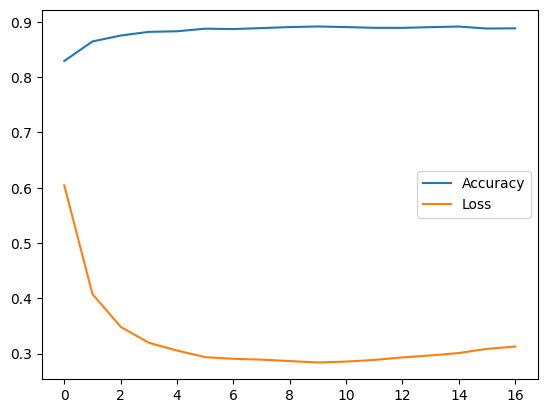

In [69]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(val_acc, label='Accuracy')
plt.plot(val_loss, label='Loss')
plt.legend()
plt.show()

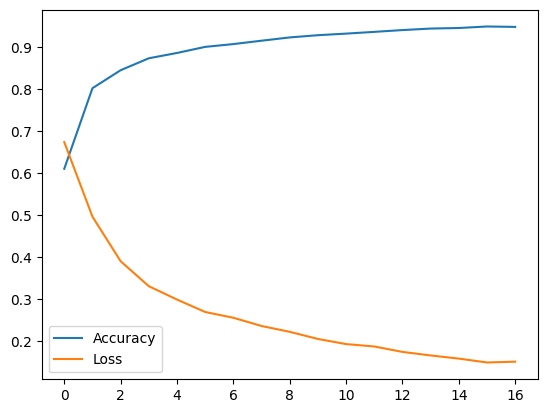

In [70]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

In [71]:
loss, accuracy = model.evaluate(encoded_X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(encoded_X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9913
Testing Accuracy:  0.8883


**8-Recurrent Neural Networks**

In [72]:
model = tf.keras.Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        LSTM(32, return_sequences=False),  
        Dropout(0.2),      
        Dense(1, activation='sigmoid')])

In [73]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [74]:
history = model.fit(encoded_X_train, y_train,
                    epochs=20,
                    validation_data=(encoded_X_test, y_test),
                    batch_size=32,
                    callbacks=[Callback])

Epoch 1/20
547/547 [==============================] - 74s 132ms/step - loss: 0.4254 - accuracy: 0.7997 - val_loss: 0.3030 - val_accuracy: 0.8767
Epoch 2/20
547/547 [==============================] - 59s 107ms/step - loss: 0.2220 - accuracy: 0.9202 - val_loss: 0.4475 - val_accuracy: 0.7924
Epoch 3/20
547/547 [==============================] - 55s 101ms/step - loss: 0.1257 - accuracy: 0.9592 - val_loss: 0.3508 - val_accuracy: 0.8795
Epoch 4/20
547/547 [==============================] - 50s 92ms/step - loss: 0.0583 - accuracy: 0.9833 - val_loss: 0.4284 - val_accuracy: 0.8739
Epoch 5/20
547/547 [==============================] - 49s 89ms/step - loss: 0.0385 - accuracy: 0.9893 - val_loss: 0.5745 - val_accuracy: 0.8669
Epoch 6/20
547/547 [==============================] - 49s 89ms/step - loss: 0.0252 - accuracy: 0.9931 - val_loss: 0.5364 - val_accuracy: 0.8481
Epoch 7/20
547/547 [==============================] - 47s 87ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.6017 - val_accura

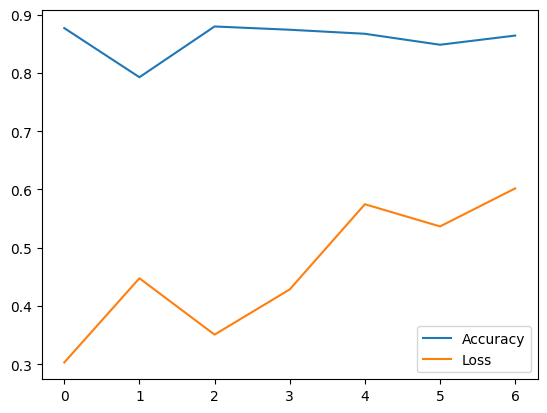

In [75]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(val_acc, label='Accuracy')
plt.plot(val_loss, label='Loss')
plt.legend()
plt.show()

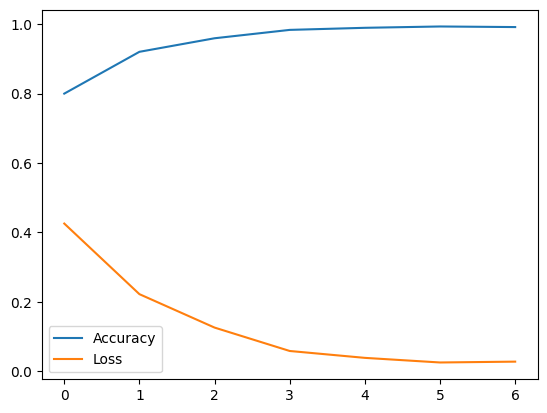

In [76]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

In [77]:
loss, accuracy = model.evaluate(encoded_X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(encoded_X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9975
Testing Accuracy:  0.8639
